In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

Data Exploration

In [33]:
df = pd.read_excel('/content/online_retail_II.xlsx')

In [48]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [34]:
df.shape

(525461, 8)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [38]:
df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,525461.000000,525461,525461.000000,417534.000000
mean,10.337667,2010-06-28 11:37:36.845017856,4.688834,15360.645478
min,-9600.000000,2009-12-01 07:45:00,-53594.360000,12346.000000
25%,1.000000,2010-03-21 12:20:00,1.250000,13983.000000
50%,3.000000,2010-07-06 09:51:00,2.100000,15311.000000
75%,10.000000,2010-10-15 12:45:00,4.210000,16799.000000
max,19152.000000,2010-12-09 20:01:00,25111.090000,18287.000000
std,107.424110,NaN,146.126914,1680.811316


In [39]:
df.describe(include='O')

,Invoice,StockCode,Description,Country
count,525461,525461,522533,525461
unique,28816,4632,4681,40
top,537434,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,675,3516,3549,485852


In [42]:
df[df['Customer ID'].isna()].head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.00,NaN,United Kingdom
283,489463,71477,short,-240,2009-12-01 10:52:00,0.00,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.00,NaN,United Kingdom
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.00,NaN,United Kingdom
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.55,NaN,United Kingdom


In [41]:
df[df['Quantity']<0].head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia


In [44]:
df['Invoice'] = df['Invoice'].astype('str')
df[df['Invoice'].str.match('^\\d{6}') == False]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
...,...,...,...,...,...,...,...,...
524695,C538123,22956,36 FOIL HEART CAKE CASES,-2,2010-12-09 15:41:00,2.10,12605.0,Germany
524696,C538124,M,Manual,-4,2010-12-09 15:43:00,0.50,15329.0,United Kingdom
524697,C538124,22699,ROSES REGENCY TEACUP AND SAUCER,-1,2010-12-09 15:43:00,2.95,15329.0,United Kingdom
524698,C538124,22423,REGENCY CAKESTAND 3 TIER,-1,2010-12-09 15:43:00,12.75,15329.0,United Kingdom


In [46]:
df['Invoice'].str.replace('[0-9]','',regex=True).unique()

array(['', 'C', 'A'], dtype=object)

In [47]:
df[df["Invoice"].str.startswith("A")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
179403,A506401,B,Adjust bad debt,1,2010-04-29 13:36:00,-53594.36,NaN,United Kingdom
276274,A516228,B,Adjust bad debt,1,2010-07-19 11:24:00,-44031.79,NaN,United Kingdom
403472,A528059,B,Adjust bad debt,1,2010-10-20 12:04:00,-38925.87,NaN,United Kingdom


In [52]:
df["StockCode"] = df['StockCode'].astype('str')
df[(df['StockCode'].str.match('^\\d{5}$')== False)&(df['StockCode'].str.match('^\\d{5}[a-zA-Z]+$')== False)]['StockCode'].unique()

array(['POST', 'D', 'DCGS0058', 'DCGS0068', 'DOT', 'M', 'DCGS0004',
       'DCGS0076', 'C2', 'BANK CHARGES', 'DCGS0003', 'TEST001',
       'gift_0001_80', 'DCGS0072', 'gift_0001_20', 'DCGS0044', 'TEST002',
       'gift_0001_10', 'gift_0001_50', 'DCGS0066N', 'gift_0001_30',
       'PADS', 'ADJUST', 'gift_0001_40', 'gift_0001_60', 'gift_0001_70',
       'gift_0001_90', 'DCGSSGIRL', 'DCGS0006', 'DCGS0016', 'DCGS0027',
       'DCGS0036', 'DCGS0039', 'DCGS0060', 'DCGS0056', 'DCGS0059', 'GIFT',
       'DCGSLBOY', 'm', 'DCGS0053', 'DCGS0062', 'DCGS0037', 'DCGSSBOY',
       'DCGSLGIRL', 'S', 'DCGS0069', 'DCGS0070', 'DCGS0075', 'B',
       'DCGS0041', 'ADJUST2', '47503J ', 'C3', 'SP1002', 'AMAZONFEE'],
      dtype=object)

In [55]:
df[df['StockCode'].str.contains('^DOT')]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
2379,489597,DOT,DOTCOM POSTAGE,1,2009-12-01 14:28:00,647.19,NaN,United Kingdom
2539,489600,DOT,DOTCOM POSTAGE,1,2009-12-01 14:43:00,55.96,NaN,United Kingdom
2551,489601,DOT,DOTCOM POSTAGE,1,2009-12-01 14:44:00,68.39,NaN,United Kingdom
2571,489602,DOT,DOTCOM POSTAGE,1,2009-12-01 14:45:00,59.35,NaN,United Kingdom
2619,489603,DOT,DOTCOM POSTAGE,1,2009-12-01 14:46:00,42.39,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
524272,538071,DOT,DOTCOM POSTAGE,1,2010-12-09 14:09:00,885.94,NaN,United Kingdom
524887,538148,DOT,DOTCOM POSTAGE,1,2010-12-09 16:26:00,547.32,NaN,United Kingdom
525000,538149,DOT,DOTCOM POSTAGE,1,2010-12-09 16:27:00,620.68,NaN,United Kingdom
525126,538153,DOT,DOTCOM POSTAGE,1,2010-12-09 16:31:00,822.94,NaN,United Kingdom


Data Cleaning

In [56]:
cleaned_df = df.copy()

In [57]:
cleaned_df["Invoice"] = cleaned_df["Invoice"].astype('str')
mask = (
    cleaned_df['Invoice'].str.match("^\\d{6}$") == True
)
cleaned_df = cleaned_df[mask]
cleaned_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


In [65]:
cleaned_df["StockCode"] = cleaned_df["StockCode"].astype('str')

mask = (
    (cleaned_df['StockCode'].str.match('^\\d{5}$')==True)|
    (cleaned_df['StockCode'].str.match('^\\{5}[a-aZ-Z]+$')==True)|
    (cleaned_df['StockCode'].str.match('^PADS$')==True)
)
cleaned_df = cleaned_df[mask]
cleaned_df

/tmp/ipython-input-1576673586.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df["StockCode"] = cleaned_df["StockCode"].astype('str')


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.0,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


In [69]:
cleaned_df.dropna(subset=['Customer ID'], inplace = True)

In [66]:
cleaned_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,437344.000000,437344,437344.000000,350943.000000
mean,11.213084,2010-07-03 09:58:02.483994112,3.366221,15360.244439
min,-9600.000000,2009-12-01 07:45:00,0.000000,12346.000000
25%,1.000000,2010-03-28 11:02:00,1.250000,13985.000000
50%,4.000000,2010-07-15 11:08:00,2.100000,15311.000000
75%,12.000000,2010-10-18 14:07:00,4.210000,16797.000000
max,19152.000000,2010-12-09 20:01:00,1157.150000,18287.000000
std,109.000782,NaN,5.226559,1678.202935


In [71]:
len(cleaned_df[cleaned_df['Price']==0])

27

In [73]:
cleaned_df = cleaned_df[cleaned_df['Price']>0]

In [74]:
cleaned_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,350916.000000,350916,350916.000000,350916.000000
mean,13.700059,2010-07-05 17:14:15.798311168,2.979794,15360.352694
min,1.000000,2009-12-01 07:45:00,0.001000,12346.000000
25%,2.000000,2010-03-31 17:29:00,1.250000,13985.000000
50%,5.000000,2010-07-18 13:42:00,1.950000,15311.000000
75%,12.000000,2010-10-17 14:26:00,3.750000,16797.000000
max,19152.000000,2010-12-09 20:01:00,295.000000,18287.000000
std,100.078594,NaN,4.424766,1678.162970


In [75]:
cleaned_df['Price'].min()

0.001

In [76]:
len(cleaned_df)/len(df)

0.667825014606222

Feature enginering

In [78]:
cleaned_df['SalesLineTotal'] = cleaned_df['Quantity'] * cleaned_df['Price']
cleaned_df

/tmp/ipython-input-3309217499.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['SalesLineTotal'] = cleaned_df['Quantity'] * cleaned_df['Price']


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,SalesLineTotal
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.40
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.00
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.0,United Kingdom,39.60
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.00
...,...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom,5.90
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,3.75
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,3.75
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,7.50


In [81]:
agregat_df = cleaned_df.groupby(by='Customer ID',as_index=False) \
  .agg(
      MonetaryValue=('SalesLineTotal','sum'),
      Frequency = ('Invoice','nunique'),
      LastInvoiceDate = ('InvoiceDate','max')
  )

In [82]:
agregat_df.head()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate
0,12346.0,144.02,2,2010-06-28 13:53:00
1,12347.0,966.87,2,2010-12-07 14:57:00
2,12348.0,221.16,1,2010-09-27 14:59:00
3,12349.0,1946.64,2,2010-10-28 08:23:00
4,12351.0,300.93,1,2010-11-29 15:23:00


In [86]:
max_invoice_date = agregat_df['LastInvoiceDate'].max()
agregat_df['Recency'] = (max_invoice_date - agregat_df['LastInvoiceDate']).dt.days
agregat_df.head()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
0,12346.0,144.02,2,2010-06-28 13:53:00,164
1,12347.0,966.87,2,2010-12-07 14:57:00,2
2,12348.0,221.16,1,2010-09-27 14:59:00,73
3,12349.0,1946.64,2,2010-10-28 08:23:00,42
4,12351.0,300.93,1,2010-11-29 15:23:00,10


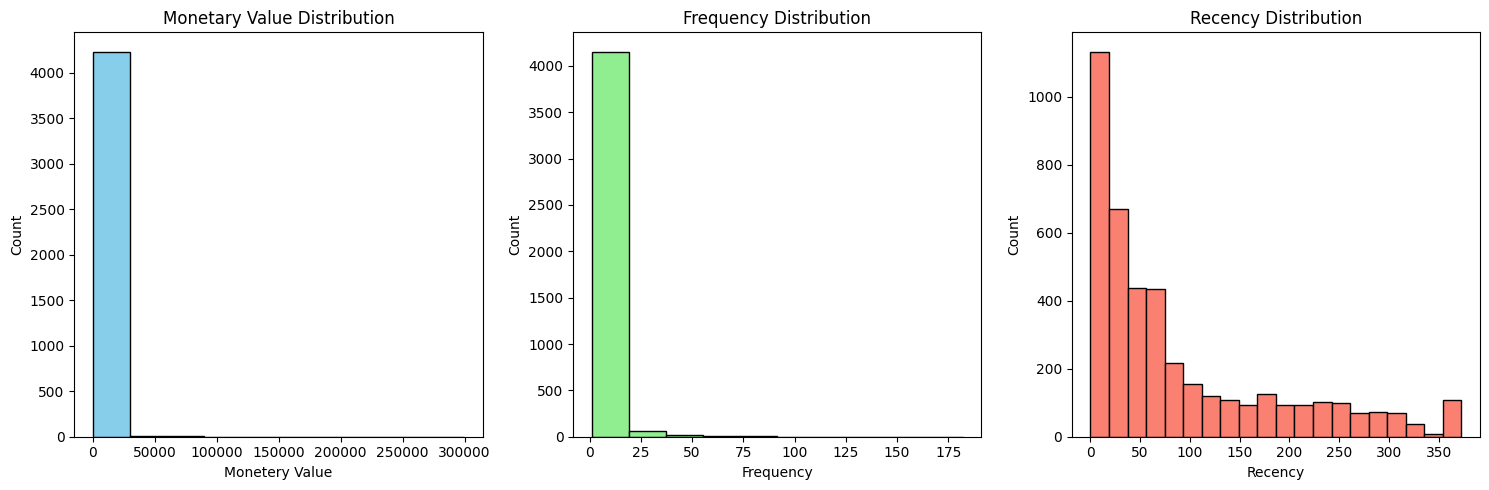

In [90]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.hist(agregat_df['MonetaryValue'],bins=10,color='skyblue',edgecolor='black')
plt.title('Monetary Value Distribution')
plt.xlabel('Monetery Value')
plt.ylabel('Count')

plt.subplot(1, 3, 2)
plt.hist(agregat_df['Frequency'], bins=10, color='lightgreen', edgecolor='black')
plt.title('Frequency Distribution')
plt.xlabel('Frequency')
plt.ylabel('Count')

plt.subplot(1, 3, 3)
plt.hist(agregat_df['Recency'], bins=20, color='salmon', edgecolor='black')
plt.title('Recency Distribution')
plt.xlabel('Recency')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

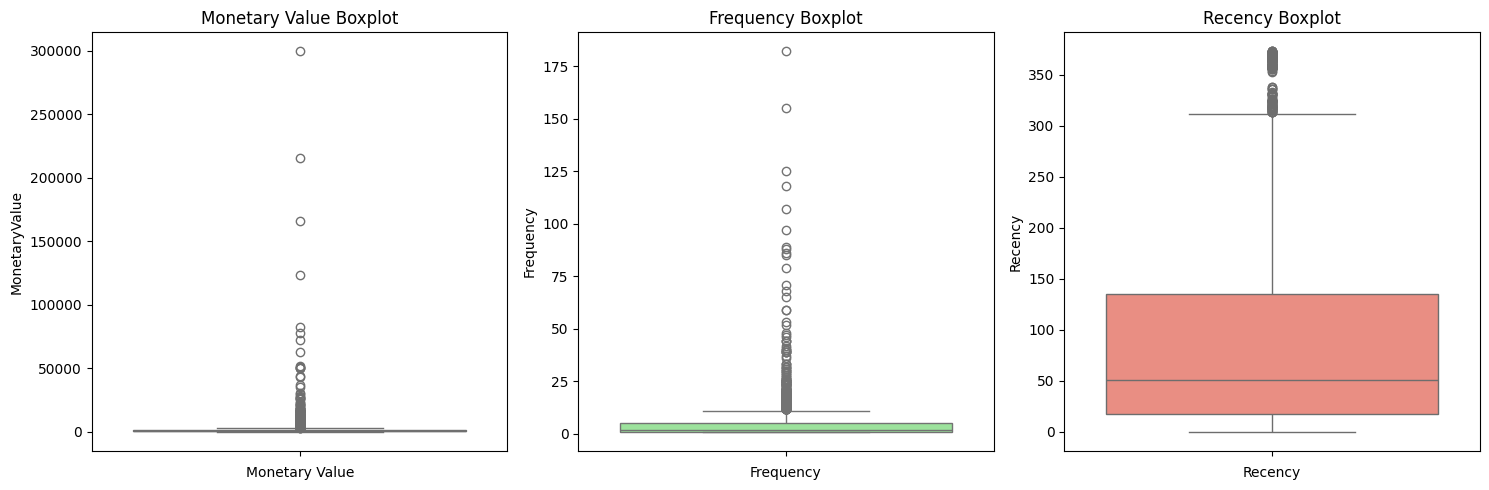

In [91]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(data=agregat_df['MonetaryValue'], color='skyblue')
plt.title('Monetary Value Boxplot')
plt.xlabel('Monetary Value')

plt.subplot(1, 3, 2)
sns.boxplot(data=agregat_df['Frequency'], color='lightgreen')
plt.title('Frequency Boxplot')
plt.xlabel('Frequency')

plt.subplot(1, 3, 3)
sns.boxplot(data=agregat_df['Recency'], color='salmon')
plt.title('Recency Boxplot')
plt.xlabel('Recency')

plt.tight_layout()
plt.show()

In [106]:
M_q1 = agregat_df['MonetaryValue'].quantile(0.25)
M_q3 = agregat_df['MonetaryValue'].quantile(0.75)
M_IQR = M_q3 - M_q1

monetary_outlier_df = agregat_df[(agregat_df['MonetaryValue'] > (M_q3 + 1.5 * M_IQR)) | (agregat_df['MonetaryValue']<(M_q1 - 1.5 * M_IQR))].copy()

monetary_outlier_df.describe()


,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,412.000000,412.000000,412.000000,412,412.000000
mean,15083.296117,10433.185937,17.033981,2010-11-10 21:01:28.106796032,28.674757
min,12357.000000,3308.900000,1.000000,2009-12-10 18:03:00,0.000000
25%,13561.750000,3957.300000,8.000000,2010-11-08 13:45:45,3.000000
50%,14956.500000,5389.850000,12.000000,2010-11-26 15:03:30,13.000000
75%,16653.000000,8847.182500,18.000000,2010-12-06 12:47:30,31.000000
max,18260.000000,299485.800000,182.000000,2010-12-09 19:32:00,364.000000
std,1733.822102,22291.545824,19.376882,NaN,49.154417


In [101]:
M_q1 = agregat_df['Frequency'].quantile(0.25)
M_q3 = agregat_df['Frequency'].quantile(0.75)
M_IQR = M_q3 - M_q1

frequency_outliers_df = agregat_df[(agregat_df['Frequency'] > (M_q3 + 1.5 * M_IQR)) | (agregat_df['Frequency']<(M_q1 - 1.5 * M_IQR))].copy()

frequency_outliers_df.describe()


,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,269.000000,269.000000,269.000000,269,269.000000
mean,15392.802974,12298.980725,23.698885,2010-11-23 16:23:39.033456896,15.866171
min,12437.000000,898.140000,12.000000,2010-05-12 16:51:00,0.000000
25%,13831.000000,3638.010000,13.000000,2010-11-21 10:38:00,2.000000
50%,15527.000000,5572.670000,17.000000,2010-12-02 12:09:00,7.000000
75%,16883.000000,10269.460000,24.000000,2010-12-07 12:43:00,18.000000
max,18260.000000,299485.800000,182.000000,2010-12-09 19:32:00,211.000000
std,1748.380712,27198.754282,21.578787,NaN,26.789616


In [102]:
non_outliers_df = agregat_df[(~agregat_df.index.isin(monetary_outlier_df.index) & (~agregat_df.index.isin(frequency_outliers_df.index)))]
non_outliers_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,3979.000000,3979.000000,3979.000000,3979,3979.000000
mean,15351.266147,1013.710286,3.070118,2010-09-06 03:54:49.504900864,94.389545
min,12346.000000,2.950000,1.000000,2009-12-01 12:55:00,0.000000
25%,13891.500000,246.845000,1.000000,2010-07-16 08:46:00,21.000000
50%,15350.000000,546.570000,2.000000,2010-10-14 18:02:00,56.000000
75%,16834.500000,1255.655000,4.000000,2010-11-18 13:28:30,146.000000
max,18287.000000,50259.380000,11.000000,2010-12-09 20:01:00,373.000000
std,1696.058224,1626.476851,2.449563,NaN,97.354161


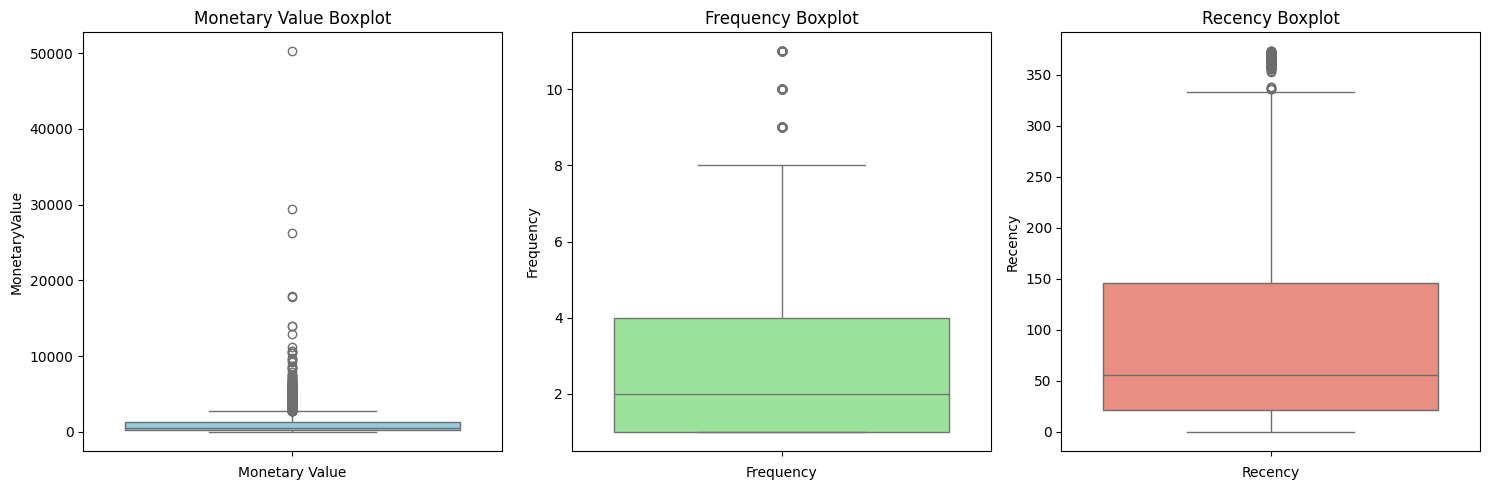

In [104]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(data=non_outliers_df['MonetaryValue'], color='skyblue')
plt.title('Monetary Value Boxplot')
plt.xlabel('Monetary Value')

plt.subplot(1, 3, 2)
sns.boxplot(data=non_outliers_df['Frequency'], color='lightgreen')
plt.title('Frequency Boxplot')
plt.xlabel('Frequency')

plt.subplot(1, 3, 3)
sns.boxplot(data=non_outliers_df['Recency'], color='salmon')
plt.title('Recency Boxplot')
plt.xlabel('Recency')

plt.tight_layout()
plt.show()

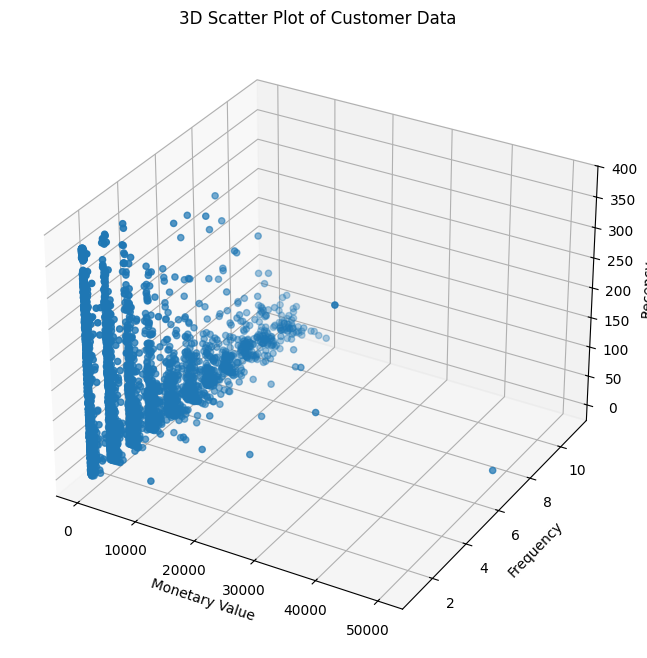

In [107]:
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(projection="3d")

scatter = ax.scatter(non_outliers_df["MonetaryValue"], non_outliers_df["Frequency"], non_outliers_df["Recency"])

ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title('3D Scatter Plot of Customer Data')

plt.show()

In [108]:
scaler = StandardScaler()

scaled_data = scaler.fit_transform(non_outliers_df[["MonetaryValue", "Frequency", "Recency"]])

scaled_data

array([[-0.53477527, -0.43691565,  0.71511277],
       [-0.02880224, -0.43691565, -0.94912386],
       [-0.48734164, -0.84520296, -0.2197362 ],
       ...,
       [-0.4012921 , -0.84520296,  2.06088437],
       [-0.04022099, -0.43691565,  0.17064029],
       [ 0.32594767,  0.37965897, -0.79502788]])

In [109]:
scaled_data_df = pd.DataFrame(scaled_data, index=non_outliers_df.index, columns=("MonetaryValue", "Frequency", "Recency"))

scaled_data_df

,MonetaryValue,Frequency,Recency
0,-0.534775,-0.436916,0.715113
1,-0.028802,-0.436916,-0.949124
2,-0.487342,-0.845203,-0.219736
3,0.573661,-0.436916,-0.538201
4,-0.438291,-0.845203,-0.866939
...,...,...,...
4243,-0.277026,1.196234,-0.795028
4244,-0.382734,-0.845203,-0.291648
4245,-0.401292,-0.845203,2.060884
4246,-0.040221,-0.436916,0.170640


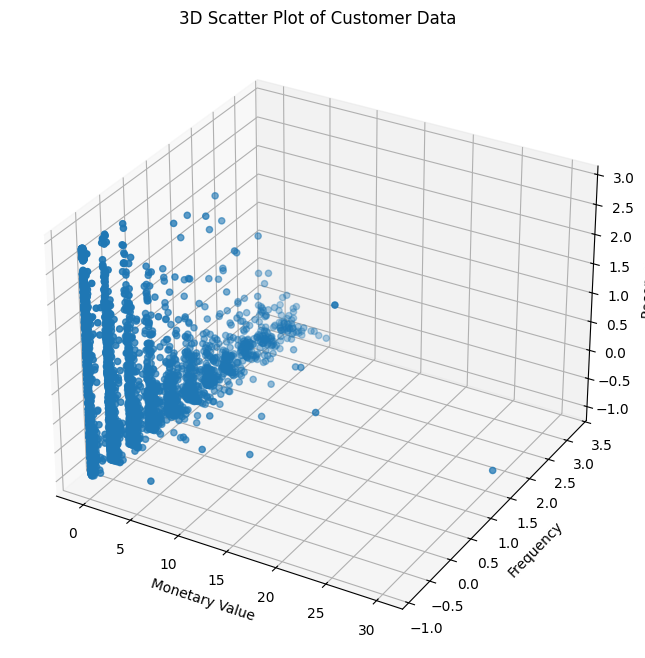

In [110]:
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(projection="3d")

scatter = ax.scatter(scaled_data_df["MonetaryValue"], scaled_data_df["Frequency"], scaled_data_df["Recency"])

ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title('3D Scatter Plot of Customer Data')

plt.show()

Kmeans Clustering

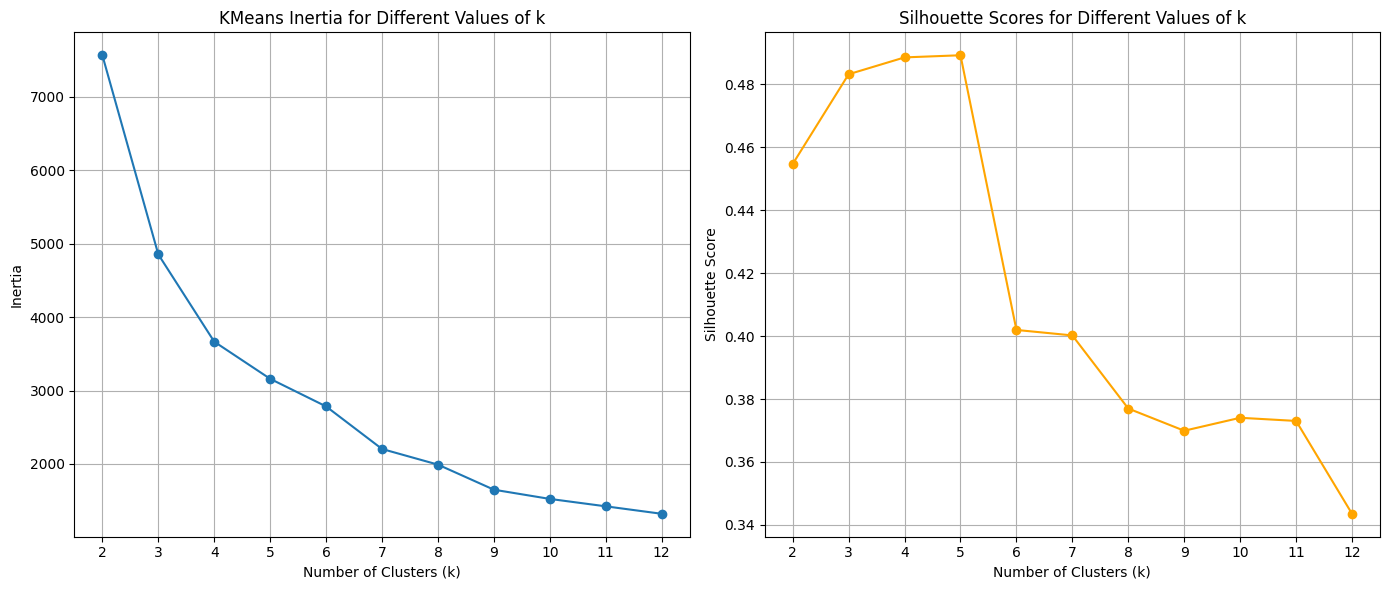

In [111]:
max_k = 12

inertia = []
silhoutte_scores = []
k_values = range(2, max_k + 1)

for k in k_values:

    kmeans = KMeans(n_clusters=k, random_state=42, max_iter=1000)

    cluster_labels = kmeans.fit_predict(scaled_data_df)

    sil_score = silhouette_score(scaled_data_df, cluster_labels)

    silhoutte_scores.append(sil_score)

    inertia.append(kmeans.inertia_)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, marker='o')
plt.title('KMeans Inertia for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(k_values, silhoutte_scores, marker='o', color='orange')
plt.title('Silhouette Scores for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.grid(True)

plt.tight_layout()
plt.show()

Silhouette Score

In [112]:
kmeans = KMeans(n_clusters=4, random_state=42, max_iter=1000)

cluster_labels = kmeans.fit_predict(scaled_data_df)

cluster_labels

array([2, 0, 0, ..., 2, 0, 0], dtype=int32)

In [113]:
non_outliers_df["Cluster"] = cluster_labels

non_outliers_df

/tmp/ipython-input-3577770544.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_outliers_df["Cluster"] = cluster_labels


,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
0,12346.0,144.02,2,2010-06-28 13:53:00,164,2
1,12347.0,966.87,2,2010-12-07 14:57:00,2,0
2,12348.0,221.16,1,2010-09-27 14:59:00,73,0
3,12349.0,1946.64,2,2010-10-28 08:23:00,42,0
4,12351.0,300.93,1,2010-11-29 15:23:00,10,0
...,...,...,...,...,...,...
4243,18283.0,563.19,6,2010-11-22 15:30:00,17,1
4244,18284.0,391.28,1,2010-10-04 11:33:00,66,0
4245,18285.0,361.10,1,2010-02-17 10:24:00,295,2
4246,18286.0,948.30,2,2010-08-20 11:57:00,111,0


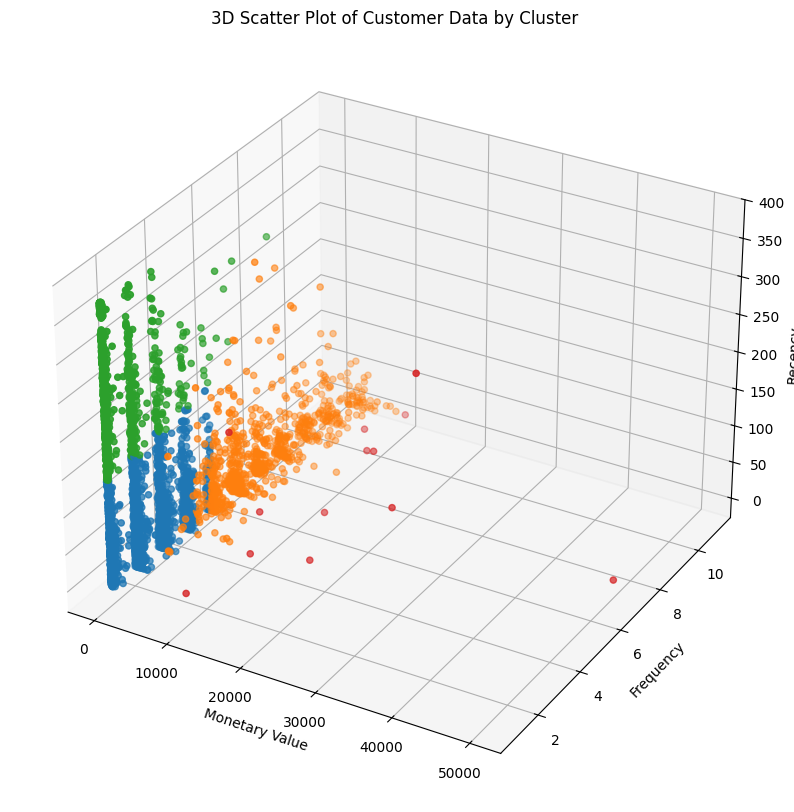

In [114]:
cluster_colors = {0: '#1f77b4',  # Blue
                  1: '#ff7f0e',  # Orange
                  2: '#2ca02c',  # Green
                  3: '#d62728'}  # Red

colors = non_outliers_df['Cluster'].map(cluster_colors)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

scatter = ax.scatter(non_outliers_df['MonetaryValue'],
                     non_outliers_df['Frequency'],
                     non_outliers_df['Recency'],
                     c=colors,  # Use mapped solid colors
                     marker='o')

ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title('3D Scatter Plot of Customer Data by Cluster')

plt.show()